In [1]:
!pip install Kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Importing Dataset from Kaggle

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:09<00:00, 21.3MB/s]
100% 163M/163M [00:09<00:00, 17.6MB/s]


In [4]:
from zipfile import ZipFile
data = '/content/face-mask-dataset.zip'

with ZipFile(data, 'r') as zip:
  zip.extractall()

In [5]:
!ls

data   face-mask-dataset.zip  sample_data
drive  kaggle.json	      shutterstock_1742084420.jpg


# Importing Libraries

In [43]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Data Importing and Preprocessing

In [7]:
#Make a list of images with mask
face_with_mask = os.listdir('/content/data/with_mask')
#Make a list of images without mask
face_without_mask = os.listdir('/content/data/without_mask')

In [8]:
print(face_with_mask[0:5])
print(face_without_mask[0:5])

['with_mask_1685.jpg', 'with_mask_1267.jpg', 'with_mask_2474.jpg', 'with_mask_2007.jpg', 'with_mask_3233.jpg']
['without_mask_76.jpg', 'without_mask_829.jpg', 'without_mask_1647.jpg', 'without_mask_3491.jpg', 'without_mask_3213.jpg']


In [9]:
print('Number of images with mask:', len(face_with_mask))
print('Number of images without mask:', len(face_without_mask))

Number of images with mask: 3725
Number of images without mask: 3828


In [10]:
#Creating labels for the two classes
with_mask_label = [1]*len(face_with_mask)
without_mask_label = [0]*len(face_without_mask)

In [11]:
print(with_mask_label[0:5])
print(without_mask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
labels = with_mask_label + without_mask_label

print(len(labels))

7553


# Image Preprocessing
* Resize images
* Convert Images to NumPy arrays

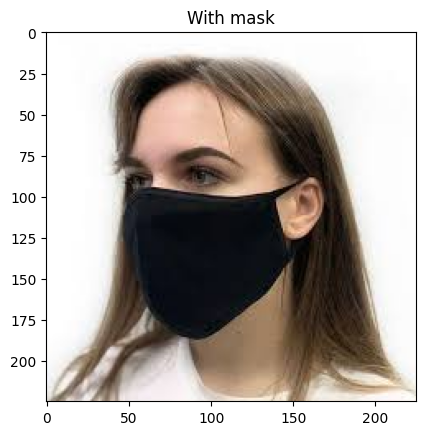

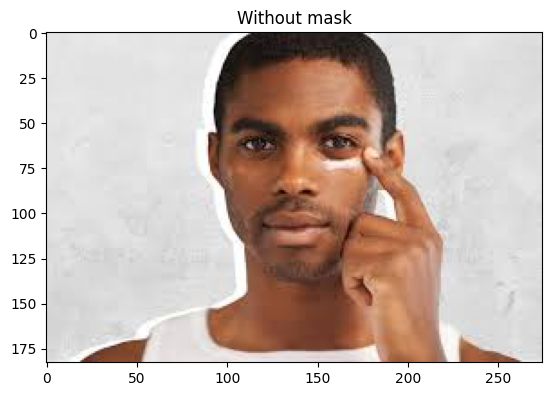

In [13]:
#Displaying some of the images with mask and without mask
mask_img = mpimg.imread('/content/data/with_mask/with_mask_2310.jpg') #Reads the image in the form of numpy array
img = plt.imshow(mask_img)
plt.title('With mask')
plt.show()

nomask_img = mpimg.imread('/content/data/without_mask/without_mask_2507.jpg') #Reads the image in the form of numpy array
img = plt.imshow(nomask_img)
plt.title('Without mask')
plt.show()

In [14]:
#Image Processing, Resizing and converting to numpy array and storing in a list 'dataset'.
with_mask_path = '/content/data/with_mask/'

dataset = []

for img_file in face_with_mask:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))  #resize the image in 128 x 128 size
  image = image.convert('RGB')  #Convert all the images to RGB colour channel
  image = np.array(image)    #Converting the iages into numpy array
  dataset.append(image)


without_mask_path = '/content/data/without_mask/'

for img_file in face_without_mask:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))  #resize the image in 128 x 128 size
  image = image.convert('RGB')  #Convert all the images to RGB colour channel
  image = np.array(image)    #Converting the iages into numpy array
  dataset.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
dataset[0]

array([[[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       ...,

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [3, 3, 2],
        [4, 4, 2]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [3, 3, 2],
        [4, 4, 2]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [3, 3, 2],
        [4, 4, 2]]], dtype=uint8)

In [16]:
dataset[0].shape

(128, 128, 3)

In [17]:
len(dataset)

7553

* List dataset contains 7553 images in the form of numpy arrays.

In [18]:
#Converting list dataset and lables into numpy array
x = np.array(dataset)
y = np.array(labels)

print('type of dataset:',type(x))
print('type of labels:',type(y))

type of dataset: <class 'numpy.ndarray'>
type of labels: <class 'numpy.ndarray'>


In [19]:
print('shape of images',x.shape)
print('shape of labels',y.shape)

shape of images (7553, 128, 128, 3)
shape of labels (7553,)


# Train Test Split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [21]:
print(x.shape, x_train.shape, x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [22]:
print(y.shape, y_train.shape, y_test.shape)

(7553,) (6042,) (1511,)


In [23]:
#Pixel Normalisation of the training and testing images
x_train_scaled = x_train/255
x_test_scaled = x_test/255

* Now the pixel values of all the images lies between 0 and 1

# Building Neural Netwrok Architecture

In [24]:
classes = 2

model = keras.Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu',input_shape = (128,128,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten()) #ANN

#Dense layers start with 128 neurons in the first layer
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.4))  #Dropout layer prevents overfitting

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.4))

#Output layer
model.add(Dense(classes, activation = 'sigmoid'))  #Binary classification for mask and no mask

# Model Training

In [25]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [26]:
history = model.fit(x_train_scaled,y_train,
                    epochs = 30,
                    batch_size = 32,
                    validation_data=(x_test_scaled, y_test),
                    validation_split=0.1,
                    )

Epoch 1/30
189/189 [==============================] - 18s 28ms/step - loss: 0.4803 - accuracy: 0.7830 - val_loss: 0.3766 - val_accuracy: 0.8034
Epoch 2/30
189/189 [==============================] - 3s 17ms/step - loss: 0.3031 - accuracy: 0.8807 - val_loss: 0.2500 - val_accuracy: 0.9007
Epoch 3/30
189/189 [==============================] - 3s 18ms/step - loss: 0.2649 - accuracy: 0.8947 - val_loss: 0.2192 - val_accuracy: 0.9113
Epoch 4/30
189/189 [==============================] - 4s 21ms/step - loss: 0.2182 - accuracy: 0.9115 - val_loss: 0.2106 - val_accuracy: 0.9226
Epoch 5/30
189/189 [==============================] - 4s 19ms/step - loss: 0.1902 - accuracy: 0.9235 - val_loss: 0.2062 - val_accuracy: 0.9146
Epoch 6/30
189/189 [==============================] - 3s 18ms/step - loss: 0.1676 - accuracy: 0.9320 - val_loss: 0.2391 - val_accuracy: 0.9305
Epoch 7/30
189/189 [==============================] - 4s 20ms/step - loss: 0.1647 - accuracy: 0.9353 - val_loss: 0.2275 - val_accuracy: 0.928

# Model Evaluation

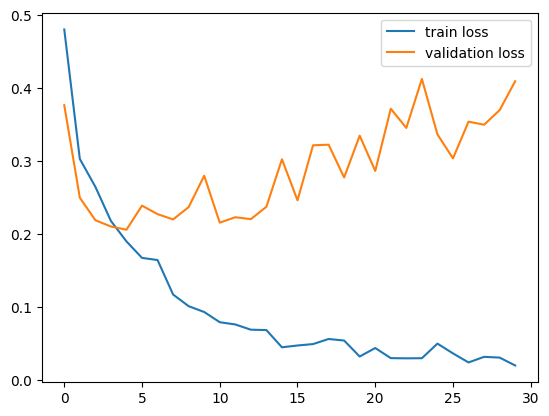

In [29]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

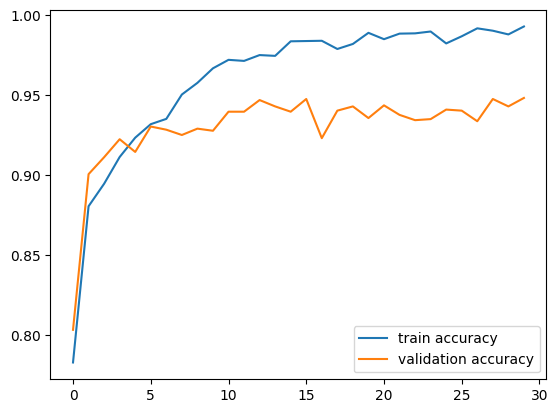

In [30]:
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

In [42]:
model.save('face_mask_detector.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Making Prediction

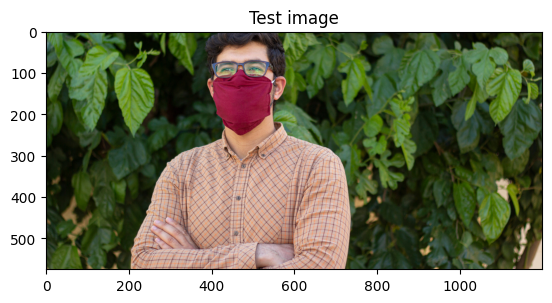

In [33]:
#Visualising the test image
test_image = mpimg.imread('/content/shutterstock_1742084420.jpg')
img = plt.imshow(test_image)
plt.title('Test image')
plt.show()

In [39]:
#Function to preprocess the image for prediction
def image_processing(image_path):
  input_image = cv2.imread(image_path)  #read image as numpy array
  input_image = cv2.resize(input_image, (128,128))  #resize the image with the input size of 128 x 128
  processed_img = input_image/255  #pixcel normalization
  processed_img = np.reshape(processed_img, [1,128,128,3])  #reshape the image for one i
  return processed_img

In [40]:
image_path = '/content/shutterstock_1742084420.jpg'
processed_image = image_processing(image_path)

In [41]:
#Making Prediction
prediction = model.predict(processed_image)
print(prediction)

pred_label = np.argmax(prediction)
print(pred_label)
if pred_label == 1:
  print('person is wearing the mask')
else:
  print('No mask')

1/1 [==============================] - 0s 338ms/step
[[3.9086143e-07 9.9928218e-01]]
1
person is wearing the mask
